In [2]:
import torch
import torch.nn as nn
from matplotlib import pyplot as plt

In [6]:
x = torch.FloatTensor(range(5)).unsqueeze(1)
y = 2*x + torch.rand(5,1)

In [7]:
x

tensor([[0.],
        [1.],
        [2.],
        [3.],
        [4.]])

In [8]:
class LinearRegressor(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc = nn.Linear(1,1,bias=True)

    def forward(self, x):
        y = self.fc(x)

        return y

In [9]:
model = LinearRegressor()
learning_rate = 1e-3
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [10]:
loss_stack = []
for epoch in range(1001):
    optimizer.zero_grad()

    y_hat = model(x)
    loss = criterion(y_hat, y)

    loss.backward()
    optimizer.step()
    loss_stack.append(loss.item())

    if epoch %100 == 0:
        print(f'epoch {epoch} : {loss.item()}')



epoch 0 : 23.659175872802734
epoch 100 : 1.6371082067489624
epoch 200 : 0.15525683760643005
epoch 300 : 0.055542755872011185
epoch 400 : 0.048832423985004425
epoch 500 : 0.04838041216135025
epoch 600 : 0.04834955930709839
epoch 700 : 0.04834701493382454
epoch 800 : 0.04834647849202156
epoch 900 : 0.048346150666475296
epoch 1000 : 0.04834585264325142


In [11]:
with torch.no_grad():
    y_hat = model(x)

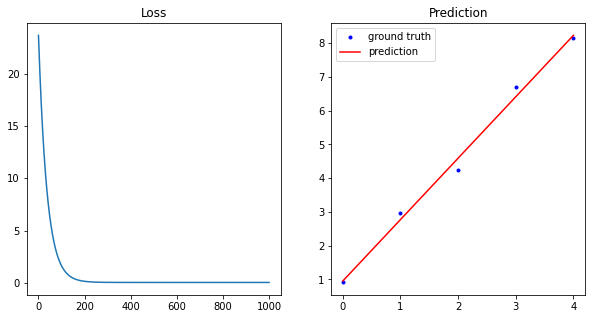

In [12]:
plt.figure(figsize=(10,5))
plt.subplot(121)

plt.plot(loss_stack)
plt.title("Loss")
plt.subplot(122)
plt.plot(x,y,'.b')
plt.plot(x,y_hat,'r-')
plt.legend(['ground truth','prediction'])
plt.title("Prediction")
plt.show()